# Introduction to Python

In the jupyter notebook [`i2r_python_intro_fk.ipynb`](i2r_python_intro_fk.ipynb) we implemented the **forward kinematics** formulation we introduced in the lecture *Course Introduction*  on slide 44. This formulation is for a **planar space 2 DoF elbow manipulator**. In this jupyter notebook we will implement a **more general formulation** for forward kinematics which allows to get the x and y coordiantes of the end effector link for a **kinemaic chain with n links**.

For a kinematic chain with **n links** and **n+1 joints** and a **base link fixed in point $[x_0, y_0]$** the position of a **joint i $[x_i, y_i]$** can be calculated as follows.

$x_i = x_{i-1} + a_i \cdot cos(\sum_{h=0}^{i} \theta_h)$ 

$y_i = y_{i-1} + a_i \cdot sin(\sum_{h=0}^{i} \theta_h)$ 

with $\{i \in \mathbb N_0 | i \le n\}$. 

Known parameters are:

- coordinates of the base link
    - $x_0$
    - $y_0$
- link lengths
    - $a_1, a_2, ... , a_n$
- joint rotation
    - $\theta_1, \theta_2, ... , \theta_n$


The implementation of the forward kinematics will be outsourced to **functions** which will be located in the [forward_kinematics.py](forward_kinematics.py) file. 

In [9]:
# import of modules for plotting and the self written functions from the 'forward_kinematics.py' file
from forward_kinematics import forward_kinematics_nLinks_2, forward_kinematics, fk_getJointCoords
import matplotlib.pyplot as plt

In [14]:
# Defining the input parameters

# Reference coord system
x_0 = 0
y_0 = 1

# Geometry of the links
a_1 = 1 # in meter
a_2 = 1 # in meter

list_a = [a_1, a_2, 1, 0.5, 0.25] # definition of the list which contains the link lengths

# Rotation of the joint
theta_1 = 90 # in degree
theta_2 = 45 # in degree

list_theta = [theta_1, theta_2, 90, -90, 45] # definition of the list which contains the joint rotations

In [15]:
# Here we call the 'forward_kinematics_nLinks_2' function
x, y = forward_kinematics_nLinks_2(a_1, a_2, theta_1, theta_2)
# Printing the results
print("x = ", str(x))
print("y = ", str(y))

x =  -0.7071067811865474
y =  1.7071067811865475


In [16]:
# Here we call the more generalized function which works for n links
x,y = forward_kinematics(x_0,y_0,list_a, list_theta)
# Printing the results
print("x = ", str(x))
print("y = ", str(y))

x =  -2.017766952966369
y =  2.353553390593274


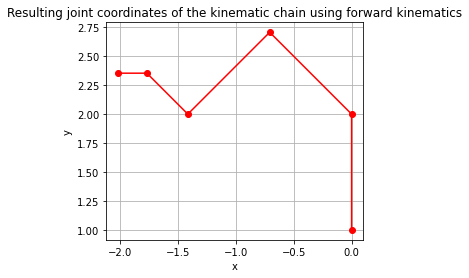

In [13]:
# Plot end position of kinematic chain
joint_x_coords, joint_y_coords = fk_getJointCoords(x_0, y_0, list_a, list_theta)
plt.figure(facecolor='white')
ax = plt.gca()
ax.set_aspect('equal')
plt.grid(True)
plt.plot(joint_x_coords, joint_y_coords, 'r-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Resulting joint coordinates of the kinematic chain using forward kinematics')
plt.show()